HIDDEN


TypeError: Missing required input: delta_interval__

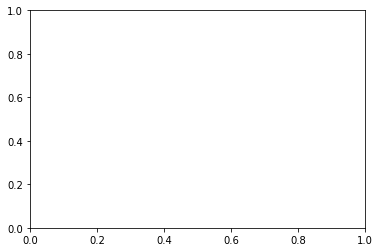

In [12]:
import numpy as np
import math
import pymc3 as pm
from scipy.stats import truncnorm, invgauss
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

#Implementing BAST-RNN from https://arxiv.org/pdf/1711.00636.pdf
#Priors are all given on page 40
#Full conditionals are given on pages 45-46

#Questions
#1) Dimension reduction on pages 12-13?
#2) What should the embedding lag and length be for the input vector on page 9? 
#3) 

#Implementation
#1) Define priors and dimensions (page 40)
#2) Run PX-MCMC from Alg 1 (page 44) from paper sampling 100,000 iterations with the first 25,000 as burn-in, 
#thinning the samples so every fifth sample post burn-in is kept (keep 15,000). Monitor convergence with trace plots of 
#parameters and posterior forecasts. (Details on pages 40-46)
#Note that in PX-MCMC: 
#Step 1 is bullet point 1 in Appendix C (sampled with Metropolis-Hastings steps)
#Steps 2-4 are bullet point 2 in Appendix C (sampled with Metropolis-Hastings steps)
#Step 5 represents bullets 3-8 in Appendix C (samples with Gibbs steps)


#HIDDEN h_t = f(delta/abs(lambda_w)*W_(h_(t-1)) + U*X~_t) from equation (4) on page 8
print('HIDDEN')

#DIMENSIONS AND DETAILS
#f is activation function, use tanh np.tanh()
#h_t: n_h x n_h hidden layer
#n_h = 20 (given number of hidden units in paper)
#w_i,l: i = 1,...,n_h ; l = 1,...,n_h | square n_h x n_h matrix 
#u_i,r: i = 1,...,n_h ; r = 1,...,(m+1)*n_x + 1
#delta scaling parameter with Unif(0,1) prior
#lambda_w is largest eigenvalue of matrix W
#h_0 = 0 by definition
#X~_t from equation (5) on page 9 is a vector of [X_t, X_(t-tau), ..., X_(t-m*tau)]
#alpha is expansion parameter with dimensions i,l both of length n_h

with pm.Model() as model:
    delta = pm.Uniform('delta', lower=0, upper=1)
    gammaw_il = pm.InverseGamma('gammaw_il', alpha=.001, beta=.001)
    


w = []



#w_il = 
#i from 1 to n_h
#

a_w = 0.2

a_w1 = (a_w - 0) / 1000
tn1 = truncnorm.pdf(0, -a_w1, a_w1)
print(tn1)

a_w2 = (a_w - 0) / math.sqrt(.001)
tn2 = truncnorm.pdf(0, -a_w2, a_w2)
print(tn2)

x = np.linspace(truncnorm.ppf(0.01, -a_w1, a_w1), truncnorm.ppf(0.99, -a_w1, a_w1), 100)
ax.plot(x, truncnorm.pdf(x, -a_w1, a_w1),'r-', lw=5, alpha=0.6, label='truncnorm pdf')




#DATA Y_t = mu + V_1*h_t + V_2*h_t^2 + epsilon_t from equation (3) on page 8
print('\n\nDATA')

#DIMENSIONS AND DETAILS
#mu ~ Gau(0, (sigma_mu)^2 * I 
#: n_y | 
#V_1: n_y x n_h
#V_2: n_y x n_h
#epsilon_t ~ Gau(0,R_t)
#R_t := (sigma_epsilon)^2 * I 
#(sigma_epsilon)^2 ~ IG(alpha_epsilon, beta_epsilon) 
#the above is inverse gamma with priors alpha_epsilon = .001 and beta_epsilon = .001


n = 20
sigma_epsilon2 = invgauss.pdf(.001, .001)
print(sigma_epsilon2)

r_t = sigma_epsilon2*np.identity(n)
epsilon_t = np.random.normal(0,r_t)
print(epsilon_t)


In [ ]:
#SAMPLING SETUP
with model:
    step = pm.Metropolis()
    trace = pm.sample(100000, step=step)
    burned_trace = trace[250000:] #burn first 250000
    thinned_trace = burned_trace[::5] #keep every 5th

In [8]:
help(pm.Normal)

Help on class Normal in module pymc3.distributions.continuous:

class Normal(pymc3.distributions.distribution.Continuous)
 |  Normal(name, *args, **kwargs)
 |  
 |  Univariate normal log-likelihood.
 |  
 |  The pdf of this distribution is
 |  
 |  .. math::
 |  
 |     f(x \mid \mu, \tau) =
 |         \sqrt{\frac{\tau}{2\pi}}
 |         \exp\left\{ -\frac{\tau}{2} (x-\mu)^2 \right\}
 |  
 |  Normal distribution can be parameterized either in terms of precision
 |  or standard deviation. The link between the two parametrizations is
 |  given by
 |  
 |  .. math::
 |  
 |     \tau = \dfrac{1}{\sigma^2}
 |  
 |  .. plot::
 |  
 |      import matplotlib.pyplot as plt
 |      import numpy as np
 |      import scipy.stats as st
 |      plt.style.use('seaborn-darkgrid')
 |      x = np.linspace(-5, 5, 1000)
 |      mus = [0., 0., 0., -2.]
 |      sds = [0.4, 1., 2., 0.4]
 |      for mu, sd in zip(mus, sds):
 |          pdf = st.norm.pdf(x, mu, sd)
 |          plt.plot(x, pdf, label=r'$\mu$ = 